## Project 06
### James Grasell
### May 10, 2021

Fetal Health Classification
Dataset: https://www.kaggle.com/andrewmvd/fetal-health-classification (Links to an external site.)

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were classified by three expert obstetricians into 3 classes:

Normal
Suspect
Pathological
Your task is to train a neural network as follows:

1) Perform a preliminary analysis on the dataset to determine which attributes have the highest correlation with the target variable. Use graphs to visualize the results.

2) Plot a histogram for the class distributions.

3) Clean the dataset by handling missing data values, scaling, encoding, etc., as necessary.

4) Create a sequential neural model.

5) Evaluate the model and display the classification scores and the confusion matrix.

6) Plot the model's accuracy/loss values as well as the validated accuracy/loss values during training.

7) Cross-validate the NN model, and calculate the mean accuracy of the folds.

8) Experiment with # hidden layers, # nodes / hidden layer, batch size, etc. to see which combinations produce a better accuracy. You may use grid search, if you wish.

9) Summarize your findings. As a sample of what is expected, please see this document:

https://github.com/bforoura/AML/blob/master/sample_project_summaries.ipynb (Links to an external site.)

10) Submit the link to your well-documented GitHub Jupyter notebook report. 

In [9]:
# import and review the first 5 records
import pandas as pd

url = 'https://raw.githubusercontent.com/jimgrasell/AML/master/Project06/Data/fetal_health.csv'
df = pd.read_csv(url, nrows=10)

df.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
# there are 8 numeric attributes and 1 binary outcome

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# correlations between various factors and the outcome show that glucose plays the most important role

df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


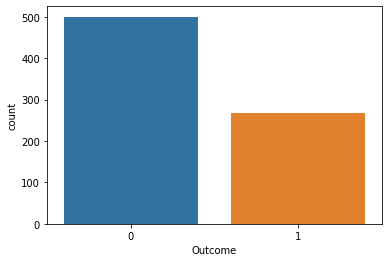

In [ ]:
# outcome distribtion is somewhat skewed

import seaborn as sns

sns.countplot(x=df.Outcome)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

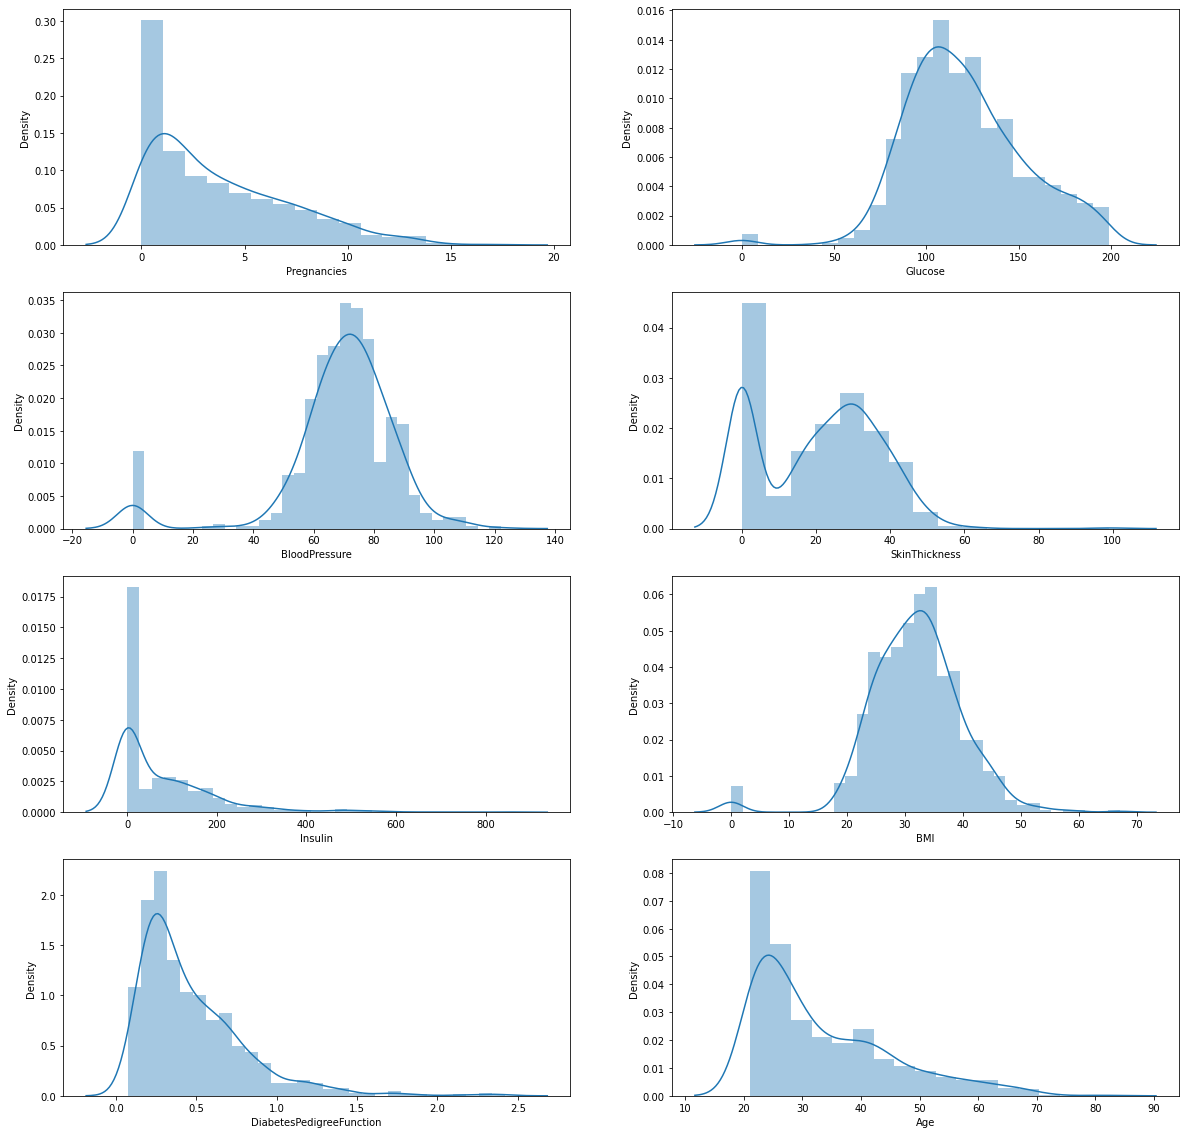

In [ ]:
# let's plot the 8 attributes

import matplotlib.pyplot as plt

f, axes = plt.subplots(4,2, figsize=(20,20))

sns.distplot(df.Pregnancies, ax=axes[0,0])
sns.distplot(df.Glucose, ax=axes[0,1])
sns.distplot(df.BloodPressure, ax=axes[1,0])
sns.distplot(df.SkinThickness, ax=axes[1,1])
sns.distplot(df.Insulin, ax=axes[2,0])
sns.distplot(df.BMI, ax=axes[2,1])
sns.distplot(df.DiabetesPedigreeFunction, ax=axes[3,0])
sns.distplot(df.Age, ax=axes[3,1])

In [ ]:
# let's replace the filler 0 values with the median 

df.SkinThickness.replace(0., df.SkinThickness.median(), inplace=True)
df.Insulin.replace(0., df.Insulin.median(), inplace=True)
df.Glucose.replace(0., df.Glucose.median(), inplace=True)
df.BloodPressure.replace(0., df.BloodPressure.median(), inplace=True)
df.BMI.replace(0, df.BMI.median(), inplace=True)


In [ ]:
# split the dataset into  (X) and  (y) variables

dataset = df.to_numpy()

X = dataset[:,0:8]
y = dataset[:,8]



In [ ]:
# all numeric values needs to be scaled

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# remove the dependent (predictor) parameter from the training set
X = df.drop('Outcome', axis =1).values
y = df.Outcome.values

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# set aside the normalized data for training and testing
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=22)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Flatten

# train a network with one hidden layer (50 nodes) and one output node
# too many hidden layers and nodes/hidden layer can cause overfitting
# experiment with these parameters to better observe the model behavior
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[X_train.shape[1],]),
  
        keras.layers.Dense(50, activation="relu"),

        keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
# lets examine the model architecture

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 50)                450       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model using appropriate parameters
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


# fit() produces a history object that contains all the details about the classifier including accuracy scores
# experiment with epochs and batch_size to see how they affect overall accuracy
history = model.fit(x=X_train, y=y_train, epochs=150, batch_size=128, validation_data=(X_test, y_test), verbose=0)

# we can track accuracy/loss as well as validated accuracy/loss measures
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
# Let's get a prediction and a classification report from the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


#y_pred = model.predict_classes(X_test)  deprecated
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# print various classification performance measures
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=[0,1]))


[[131  19]
 [ 39  42]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.69      0.52      0.59        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



(231,)

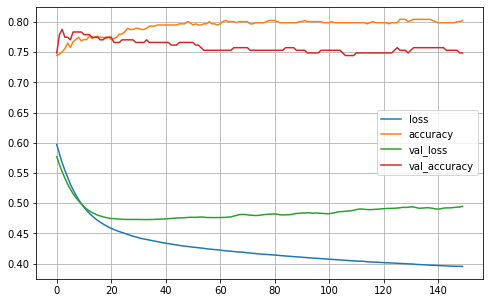

In [ ]:
# the close gaps between accuracy/loss and validated accuracy/loss verify that
# overfitting is not severe in the model

from sklearn.metrics import classification_report, accuracy_score
from matplotlib import pyplot
from numpy import where

# plot model accuracy and loss during training
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()


In [ ]:
# cross validation in keras is somewhat different than in sklearn

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np

# create the sequential NN model
def create_baseline():
    model = keras.models.Sequential([keras.layers.Flatten(), 
                                     keras.layers.Dense(50, activation="relu"), 
                                     keras.layers.Dense(1, activation="sigmoid") ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=150, verbose=0)

# do a 3-fold CV on the entire dataset
kfold = StratifiedKFold(n_splits=3, shuffle=True)
results = cross_val_score(estimator, scaled_X, y, cv=kfold)

print("Baseline accuracy: %.2f%% (+/- %.2f%%)" % (results.mean()*100, results.std()*100))



Baseline accuracy: 76.04% (+/- 1.76%)


# Best regularized results on this dataset:
Random Forest Classifier: 77.21% (+/- 7.129%)

Extra Trees Classifier  : 76.29% (+/- 6.677%)

Logistic Regression     : 78.00% (+/- 5.009%)

SVC                     : 76.43% (+/- 5.696%)

Keras                   : 78.52% (+/- 7.49%)